# Image Classification from Scratch with Numpy

## Details

* Layers = Single Layer (Fully Connected + Activation)
* [Activation Function](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6) = Sigmoid
* [Loss Function](https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8) = Mean Squared Error (MSE)

## References

* [Simple Cat Image Classification](https://towardsdatascience.com/step-by-step-guide-to-building-your-own-neural-network-from-scratch-df64b1c5ab6e) (uses Cross Entropy as Cost Function)

* [MNIST Image Classification with good matrix math explanation](https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65)


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

## Our Activation Function, the Sigmoid

In [58]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

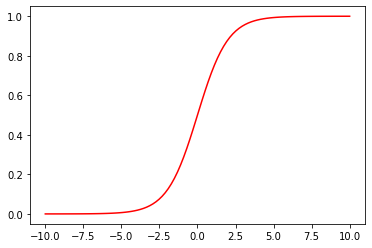

In [59]:
input = np.linspace(-10, 10, 100)

plt.plot(input, sigmoid(input), c="r")

## Derivative of Activation Function

In [60]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

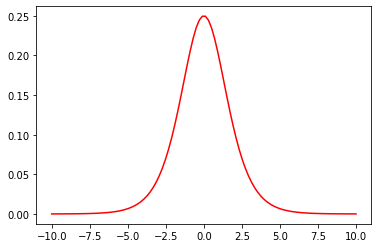

In [61]:
input = np.linspace(-10, 10, 100)

plt.plot(input, sigmoid_derivative(input), c="r")

## Load Image Data

### Use image loading util and image data from Coursera

* https://github.com/andersy005/deep-learning-specialization-coursera/tree/master/01-Neural-Networks-and-Deep-Learning/week2/Programming-Assignments

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('./'))

from lr_utils import load_dataset

In [3]:
train_set_x_orig,  train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

### Look at the Image

In [54]:
(train_set_x_orig.shape, train_set_y.shape, test_set_x_orig.shape, test_set_y.shape)

((209, 64, 64, 3), (1, 209), (50, 64, 64, 3), (1, 50))

non-cat


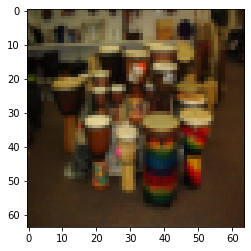

In [41]:
idx = 5

plt.imshow(train_set_x_orig[idx])
print(classes[np.squeeze(train_set_y[:,idx])].decode('utf-8'))

In [52]:

print ("Number of training examples: m_train = ", train_set_y.shape[1])
print ("Number of testing examples: m_test = ", test_set_y.shape[1])
print ("Each image is of size: ", train_set_x_orig.shape[1:4])

Number of training examples: m_train =  209
Number of testing examples: m_test =  50
Each image is of size:  (64, 64, 3)


## Flatten images into 2D matrix, and normalize

In [90]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
train_set_x_flatten.shape

(209, 12288)

In [91]:
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)
test_set_x_flatten.shape

(50, 12288)

In [92]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

## Define input and expected output (labels)

In [93]:
# independent variables

feature_set = train_set_x

feature_set.shape

(209, 12288)

In [94]:
# dependent variables

labels = train_set_y

# convert labels to vector
labels = labels.reshape(labels.shape[1],1)

labels.shape

(209, 1)

## Initialize hyperparameters

In [68]:
np.random.seed(42)

In [106]:
# define weights

weights = np.random.rand(feature_set.shape[1],1)

weights.shape

(12288, 1)

In [107]:
# bias

bias = np.random.rand(1)

bias.shape

(1,)

In [108]:
# learning rate
lr = 0.05

## step through gradient descent loop once

### forward pass

In [109]:
feature_set.shape

(209, 12288)

In [110]:
weights.shape

(12288, 1)

In [111]:
bias

array([0.90850255])

In [134]:
XW = np.dot(feature_set, weights) + bias

XW.shape

(209, 1)

In [114]:
z = sigmoid(XW)

z.shape

(209, 1)

In [116]:
labels.shape

(209, 1)

In [135]:
error = z - labels

(error.shape, error.sum())

((209, 1), -71.9415236126786)

### back-propagation

### Calculate Slope of Cost Function

* For single layer net, using chain rule, d_cost/d_weight = d_cost/d_pred * d_pred/d_z * d_z/d_w
* for MSE, d_cost/d_pred = 2(predicted - observed), which is just the error 
* for Sigmoid, d_pred/d_z is Sigmoid*(1-Sigmoid)
* for single layer, z = x1w1+x2w2+x3w3+b, so d_z/d_w = x (input)



In [118]:
d_cost_d_pred = error

d_cost_d_pred.shape

(209, 1)

In [119]:
d_pred_d_z = sigmoid_derivative(z)

d_pred_d_z.shape

(209, 1)

In [120]:
d_cost_d_z = d_cost_d_pred * d_pred_d_z

d_cost_d_z.shape

(209, 1)

In [121]:
d_z_d_w = feature_set.T

d_z_d_w.shape

(12288, 209)

In [136]:
d_cost_d_weight = np.dot(d_z_d_w, d_cost_d_z)

d_cost_d_weight.shape

(12288, 1)

In [137]:
delta = lr * d_cost_d_weight

delta.shape

(12288, 1)

In [139]:
new_weights = weights - delta

(weights.shape, new_weights.shape)

((12288, 1), (12288, 1))

In [125]:
weights = new_weights

In [140]:
d_cost_d_z.shape

(209, 1)

In [141]:
new_bias = bias

for d_cost_d_z_i in d_cost_d_z:
    new_bias = new_bias - lr * d_cost_d_z_i
    
(bias,new_bias)

(array([-0.45335823]), array([0.44591143]))

In [142]:
bias = new_bias

## Training Loop

### Initialize hyperparameters

In [129]:
np.random.seed(42)

In [143]:
# define weights

weights = np.random.rand(feature_set.shape[1],1)

weights.shape

(12288, 1)

In [131]:
# bias

bias = np.random.rand(1)

bias

array([0.08139032])

In [132]:
# learning rate
lr = 0.05

In [145]:

for epoch in range(1000):
    # forward pass
    
    XW = np.dot(feature_set, weights) + bias
    
    z = sigmoid(XW)
    error = z - labels
    print( "Epoch ", epoch, " Error: ", error.sum() )
    
    # backward pass
    
    # find slope of cost function using chain rule
    d_cost_d_pred = error
    d_pred_d_z = sigmoid_derivative(z)
    d_z_d_w = feature_set.T
 
    # do actual calc of cost function slope
    d_cost_d_z = d_cost_d_pred * d_pred_d_z
    d_cost_d_weight = np.dot(d_z_d_w, d_cost_d_z)
    
    # adjust weights via learning rate (lr)
    # NB: always SUBTRACT the adjustment since we want to DECREASE Cost Function
    weights = weights - lr * d_cost_d_weight
    
    for num in d_cost_d_z:
        bias = bias - lr*num


Epoch  0  Error:  -17.087388772776684
Epoch  1  Error:  136.99999999255792
Epoch  2  Error:  -72.0
Epoch  3  Error:  -71.07509149286193
Epoch  4  Error:  137.0
Epoch  5  Error:  -72.0
Epoch  6  Error:  136.00001083912306
Epoch  7  Error:  -72.0
Epoch  8  Error:  -34.17868879103232
Epoch  9  Error:  137.0
Epoch  10  Error:  -72.0
Epoch  11  Error:  83.16506513309312
Epoch  12  Error:  -72.0
Epoch  13  Error:  90.99164985489452
Epoch  14  Error:  -72.0
Epoch  15  Error:  41.14239025750631
Epoch  16  Error:  -72.0
Epoch  17  Error:  137.0
Epoch  18  Error:  -72.0
Epoch  19  Error:  95.81191140254283
Epoch  20  Error:  -72.0
Epoch  21  Error:  -11.020741225313992
Epoch  22  Error:  125.99204305757031
Epoch  23  Error:  -72.0
Epoch  24  Error:  -67.99668947653173
Epoch  25  Error:  137.0


/home/mhuang/miniconda3/envs/jupyter_py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch  26  Error:  -72.0
Epoch  27  Error:  131.00326171018713
Epoch  28  Error:  -72.0
Epoch  29  Error:  -15.016828607741939
Epoch  30  Error:  121.3656146198742
Epoch  31  Error:  -72.0
Epoch  32  Error:  -40.47688632147416
Epoch  33  Error:  136.0
Epoch  34  Error:  -72.0
Epoch  35  Error:  91.09750792029874
Epoch  36  Error:  -72.0
Epoch  37  Error:  59.00591854868719
Epoch  38  Error:  -72.0
Epoch  39  Error:  130.99999987340854
Epoch  40  Error:  -72.0
Epoch  41  Error:  -9.377081767615902
Epoch  42  Error:  99.98939284047691
Epoch  43  Error:  -72.0
Epoch  44  Error:  23.834053714039328
Epoch  45  Error:  -69.96046511300902
Epoch  46  Error:  136.99999999383897
Epoch  47  Error:  -72.0
Epoch  48  Error:  122.77216600952053
Epoch  49  Error:  -72.0
Epoch  50  Error:  -13.738066375194094
Epoch  51  Error:  104.00116093072994
Epoch  52  Error:  -72.0
Epoch  53  Error:  30.8812866945559
Epoch  54  Error:  -70.00000000000003
Epoch  55  Error:  136.0
Epoch  56  Error:  -72.0
Epoch  5

Epoch  278  Error:  -56.99999990671081
Epoch  279  Error:  95.67954849345303
Epoch  280  Error:  -66.99999998595398
Epoch  281  Error:  52.915898682503425
Epoch  282  Error:  -50.006922340464165
Epoch  283  Error:  85.0108618674762
Epoch  284  Error:  -63.54475967681811
Epoch  285  Error:  70.12795608744052
Epoch  286  Error:  -60.00037848359696
Epoch  287  Error:  83.51174631323329
Epoch  288  Error:  -63.35100651858654
Epoch  289  Error:  70.99768951229834
Epoch  290  Error:  -59.03717566905338
Epoch  291  Error:  82.31337280200981
Epoch  292  Error:  -64.81888156641753
Epoch  293  Error:  72.12129738365155
Epoch  294  Error:  -60.0000002330824
Epoch  295  Error:  83.94855703335637
Epoch  296  Error:  -64.99429804672135
Epoch  297  Error:  69.01239669425661
Epoch  298  Error:  -58.0
Epoch  299  Error:  82.92340239703204
Epoch  300  Error:  -63.932774980201906
Epoch  301  Error:  66.67558621604903
Epoch  302  Error:  -57.00000170333681
Epoch  303  Error:  85.42562965592822
Epoch  304 

Epoch  491  Error:  9.010976464883264
Epoch  492  Error:  -7.998683906080023
Epoch  493  Error:  11.965839066549702
Epoch  494  Error:  -9.000000307926397
Epoch  495  Error:  10.685842691381158
Epoch  496  Error:  -9.008955701018145
Epoch  497  Error:  10.995065346835204
Epoch  498  Error:  -10.00020790435083
Epoch  499  Error:  14.057524563986469
Epoch  500  Error:  -12.000025253147939
Epoch  501  Error:  15.785094783161004
Epoch  502  Error:  -13.001854210182714
Epoch  503  Error:  17.12294495570967
Epoch  504  Error:  -12.997386281493863
Epoch  505  Error:  16.36888594121359
Epoch  506  Error:  -10.428062951522527
Epoch  507  Error:  12.520726830988064
Epoch  508  Error:  -11.591792816283869
Epoch  509  Error:  15.293337928818165
Epoch  510  Error:  -13.000081146023483
Epoch  511  Error:  17.03702468009918
Epoch  512  Error:  -11.013386794525859
Epoch  513  Error:  14.464229096175085
Epoch  514  Error:  -11.726653870939757
Epoch  515  Error:  14.924348811056717
Epoch  516  Error:  -

Epoch  727  Error:  3.999968254695353
Epoch  728  Error:  -5.007857820761151
Epoch  729  Error:  5.000006720584378
Epoch  730  Error:  -2.000385874923744
Epoch  731  Error:  3.98869901346363
Epoch  732  Error:  -6.672572665508925
Epoch  733  Error:  6.999187543339056
Epoch  734  Error:  -2.0882957335739434
Epoch  735  Error:  3.0096679358971103
Epoch  736  Error:  -2.1212281708847205
Epoch  737  Error:  3.007333740048522
Epoch  738  Error:  -2.291067085754971
Epoch  739  Error:  3.125341501606327
Epoch  740  Error:  -2.6889447227017236
Epoch  741  Error:  3.997815885375447
Epoch  742  Error:  -4.718971315198515
Epoch  743  Error:  4.467569160434984
Epoch  744  Error:  -1.0010527430841623
Epoch  745  Error:  1.000315247806821
Epoch  746  Error:  0.0001505604063779531
Epoch  747  Error:  0.999999798575894
Epoch  748  Error:  -0.9998927202698598
Epoch  749  Error:  2.9963200523450615
Epoch  750  Error:  -6.763676728246217
Epoch  751  Error:  6.999552106974409
Epoch  752  Error:  -3.910328

Epoch  947  Error:  -0.0010099000673103784
Epoch  948  Error:  -0.0010059574511929762
Epoch  949  Error:  -0.001002048985482909
Epoch  950  Error:  -0.0009981742326358135
Epoch  951  Error:  -0.0009943327625706114
Epoch  952  Error:  -0.0009905241525159443
Epoch  953  Error:  -0.000986747986832879
Epoch  954  Error:  -0.000983003856888139
Epoch  955  Error:  -0.000979291360903307
Epoch  956  Error:  -0.0009756101037901527
Epoch  957  Error:  -0.0009719596970333404
Epoch  958  Error:  -0.0009683397585611288
Epoch  959  Error:  -0.0009647499125846255
Epoch  960  Error:  -0.0009611897894995364
Epoch  961  Error:  -0.0009576590257174564
Epoch  962  Error:  -0.0009541572636084703
Epoch  963  Error:  -0.0009506841513023216
Epoch  964  Error:  -0.0009472393426469532
Epoch  965  Error:  -0.0009438224970350758
Epoch  966  Error:  -0.0009404332793174269
Epoch  967  Error:  -0.0009370713596982883
Epoch  968  Error:  -0.0009337364136376746
Epoch  969  Error:  -0.0009304281216981
Epoch  970  Error:

## Predictions

In [254]:
def predict(x):
    input = np.array(x)
    result = sigmoid(np.dot(input, weights) + bias)
    return result
    

In [261]:
idx = 6

prediction = predict(test_set_x[idx])

prediction

/home/mhuang/miniconda3/envs/jupyter_py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([0.])

/home/mhuang/miniconda3/envs/jupyter_py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


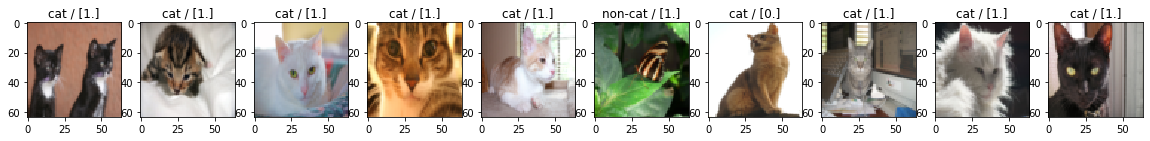

In [263]:


fig, axs = plt.subplots(1, 10, figsize=(20, 3))
for idx, ax in enumerate(axs):
    ax.imshow(test_set_x_orig[idx])
    label = classes[np.squeeze(test_set_y[:,idx])].decode('utf-8')
    prediction = predict(test_set_x[idx])
    ax.set_title(f"{label} / {prediction}")
    ax.grid(False)

plt.show()